In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\E1\Desktop\Customer Churn Project\customer_churn_dataset-training-master.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.shape

(440833, 12)

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

# Data Preprocessing

Handeling Missing Values

In [9]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

## As data is large so replace the missing values in numerical columns with mean and in categorical columns with mode.

In [10]:
# For numeical columns
numerical_col = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

for col in numerical_col:
    df[col] = df[col].fillna(df[col].mean())
    
df.isnull().sum()

CustomerID           0
Age                  0
Gender               1
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    1
Contract Length      1
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [11]:
categorical_col = ["Gender", "Subscription Type", "Contract Length"]

for col in categorical_col:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
numerical_cols = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0.000000,0.255319,Female,0.644068,0.448276,0.5,0.600000,Standard,Annual,0.924444,0.551724,1.0
1,0.000002,1.000000,Female,0.813559,0.000000,1.0,0.266667,Basic,Monthly,0.507778,0.172414,1.0
2,0.000004,0.787234,Female,0.220339,0.103448,0.6,0.600000,Basic,Quarterly,0.094444,0.068966,1.0
3,0.000007,0.851064,Male,0.627119,0.689655,0.7,0.233333,Standard,Monthly,0.328889,0.965517,1.0
4,0.000009,0.106383,Male,0.525424,0.655172,0.5,0.266667,Basic,Monthly,0.574444,0.655172,1.0


# One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

#Column transformer for One-Hot Encoding
preprocessor = ColumnTransformer ([
    ("onehot", OneHotEncoder(drop = "first", sparse_output = False), categorical_cols)
], remainder = "passthrough")

#fit and transform
preprocessor.fit(df)
encoded_array = preprocessor.transform(df)


#get feature names and clean them
feature_names = preprocessor.get_feature_names_out()
clean_feature_names = [name.split("__")[-1] for name in feature_names]  #remove prefix

# Create new DataFrame with clean column names
df = pd.DataFrame(encoded_array, columns=clean_feature_names)

df.head()

,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1.0
1,0.0,0.0,0.0,1.0,0.0,0.000002,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1.0
2,0.0,0.0,0.0,0.0,1.0,0.000004,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1.0
3,1.0,0.0,1.0,1.0,0.0,0.000007,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0
4,1.0,0.0,0.0,1.0,0.0,0.000009,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0


# Logistic Regression Model

Splitting Dataset

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, auc
import seaborn as sns

In [18]:
x = df.drop(columns= ['Churn'])
y = df['Churn'].astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.22, random_state= 42)

Training Model

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:4f}")
print(f"F1_Score: {f1:4f}")
print(f"Recall: {recall:4f}")

Accuracy: 0.9807
Precision: 0.985097
F1_Score: 0.983009
Recall: 0.980929


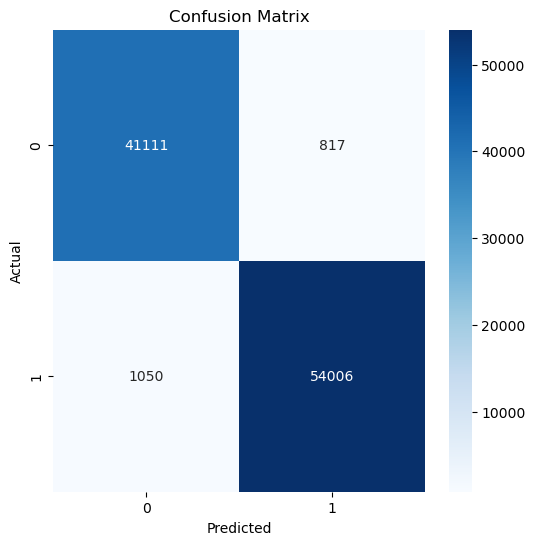

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

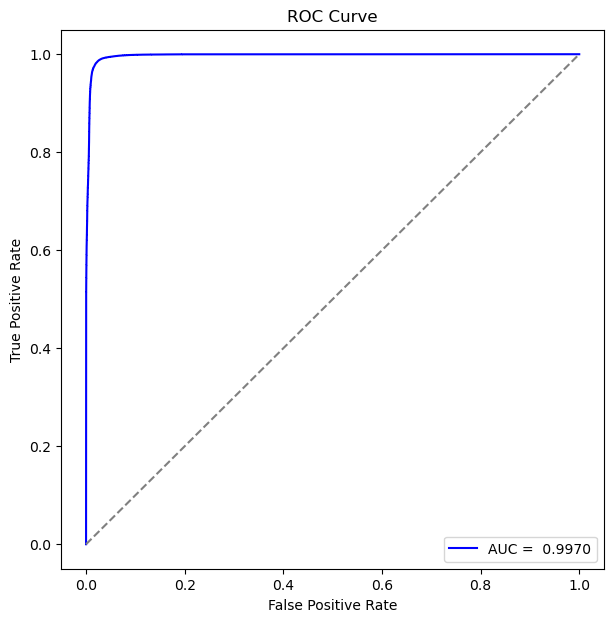

In [26]:
# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color = "blue", label= f"AUC = {roc_auc: .4f}")
plt.plot([0,1],[0,1], color = "gray", linestyle = "--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


The blue ROC curve is very close to the top-left corner, meaning the model has high sensitivity (true positive rate) and low false positives. This suggests that the model is highly effective at distinguishing between the two classes.

# Feature Importance

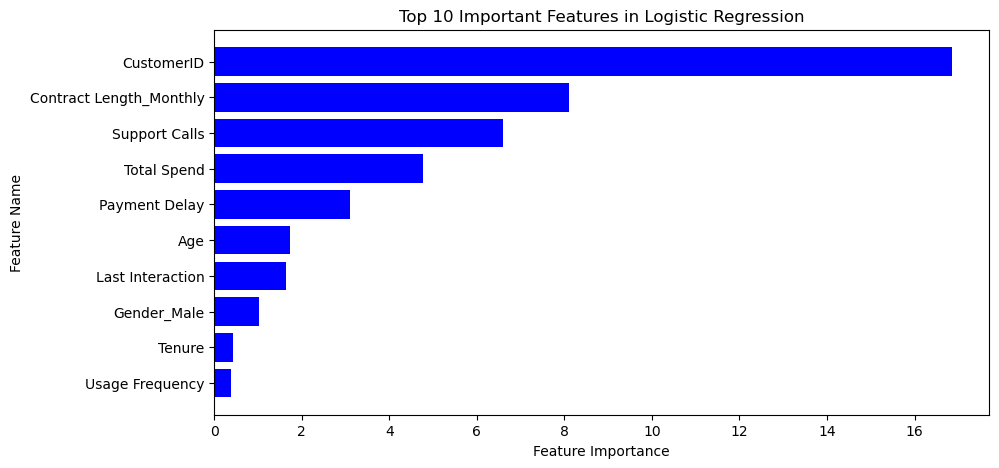

In [27]:
#Get feature importance from Logistic Regression coefficients
feature_importance = np.abs(model.coef_[0])  # Take absolute values for comparison
feature_names = X_train.columns

# Sort and plot feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

# Detecting Overfitting by compairing training and testing datset accuracies

In [31]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9805
Testing Accuracy: 0.9807


In [32]:
from sklearn.metrics import classification_report

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Set Performance:\n", classification_report(y_train, train_pred))
print("Testing Set Performance:\n", classification_report(y_test, test_pred))

Training Set Performance:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    148906
           1       0.98      0.98      0.98    194943

    accuracy                           0.98    343849
   macro avg       0.98      0.98      0.98    343849
weighted avg       0.98      0.98      0.98    343849

Testing Set Performance:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     41928
           1       0.99      0.98      0.98     55056

    accuracy                           0.98     96984
   macro avg       0.98      0.98      0.98     96984
weighted avg       0.98      0.98      0.98     96984



Model is performing well for both training and testing datasets